In [1]:
import numpy as np
import matplotlib.pyplot as plt
import frenel
import dipoles
from tqdm import tqdm

In [2]:
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

STOP = 1
dist = 20
angle = 25*np.pi/180
phase = 0
a = 0.5
wl = 700

R = np.linspace(20, 110, 100) 
P_no_spp = np.empty((len(R), 3), dtype=complex)
M_no_spp = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    p,m = p[:,0],m[:,0]
    P_no_spp[i,:], M_no_spp[i,:] = p,m
    

 20%|██        | 20/100 [00:02<00:09,  8.60it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 100/100 [00:11<00:00,  8.53it/s]


In [3]:
STOP = 45
P_spp = np.empty((len(R), 3), dtype=complex)
M_spp = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    p,m = p[:,0],m[:,0]
    P_spp[i,:], M_spp[i,:] = p,m
    

 83%|████████▎ | 83/100 [00:33<00:06,  2.51it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
100%|██████████| 100/100 [00:40<00:00,  2.49it/s]


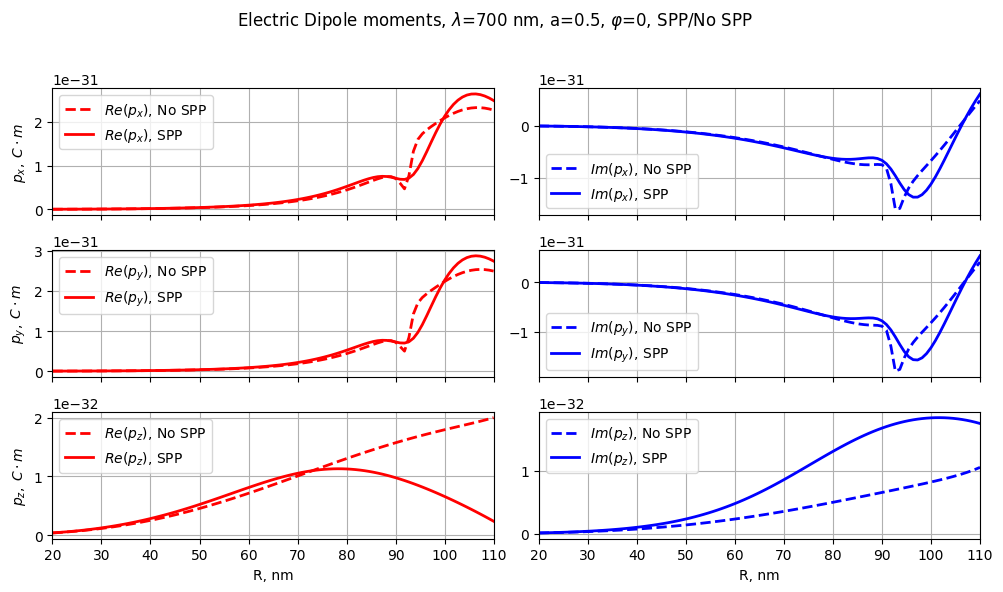

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(10, 6), sharex=True)
fig.suptitle(f"Electric Dipole moments, $\\lambda$={wl} nm, a={a}, $\\varphi$={phase}, SPP/No SPP")

# p_x components
axs[0, 0].plot(R, np.real(P_no_spp[:, 0]), label='$Re(p_x)$, No SPP', c='r', lw=2, ls='--')
axs[0, 0].plot(R, np.real(P_spp[:, 0]), label='$Re(p_x)$, SPP', c='r', lw=2)
axs[0, 0].set_ylabel('$p_x,\; C \cdot m$')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(R, np.imag(P_no_spp[:, 0]), label='$Im(p_x)$, No SPP', c='b', lw=2, ls='--')
axs[0, 1].plot(R, np.imag(P_spp[:, 0]), label='$Im(p_x)$, SPP', c='b', lw=2)
axs[0, 1].grid()
axs[0, 1].legend()

# p_y components
axs[1, 0].plot(R, np.real(P_no_spp[:, 1]), label='$Re(p_y)$, No SPP', c='r', lw=2, ls='--')
axs[1, 0].plot(R, np.real(P_spp[:, 1]), label='$Re(p_y)$, SPP', c='r', lw=2)
axs[1, 0].set_ylabel('$p_y,\; C \cdot m$')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(R, np.imag(P_no_spp[:, 1]), label='$Im(p_y)$, No SPP', c='b', lw=2, ls='--')
axs[1, 1].plot(R, np.imag(P_spp[:, 1]), label='$Im(p_y)$, SPP', c='b', lw=2)
axs[1, 1].grid()
axs[1, 1].legend()

# p_z components
axs[2, 0].plot(R, np.real(P_no_spp[:, 2]), label='$Re(p_z)$, No SPP', c='r', lw=2, ls='--')
axs[2, 0].plot(R, np.real(P_spp[:, 2]), label='$Re(p_z)$, SPP', c='r', lw=2)
axs[2, 0].set_ylabel('$p_z,\; C \cdot m$')
axs[2, 0].grid()
axs[2, 0].legend()

axs[2, 1].plot(R, np.imag(P_no_spp[:, 2]), label='$Im(p_z)$, No SPP', c='b', lw=2, ls='--')
axs[2, 1].plot(R, np.imag(P_spp[:, 2]), label='$Im(p_z)$, SPP', c='b', lw=2)
axs[2, 1].grid()
axs[2, 1].legend()

# Set x-axis limits
for ax in axs[-1]:
    ax.set_xlim(20, 110)
    
for ax in axs[-1]:
    ax.set_xlabel('R, nm')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('electric_dipoles.pdf')
plt.show()

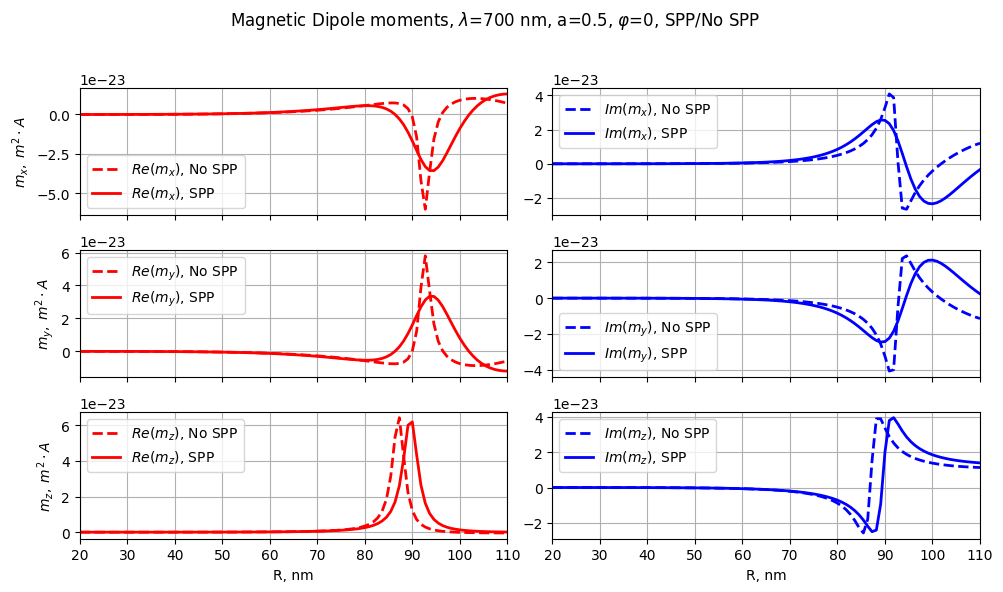

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(10, 6), sharex=True)
fig.suptitle(f"Magnetic Dipole moments, $\\lambda$={wl} nm, a={a}, $\\varphi$={phase}, SPP/No SPP")

# m_x components
axs[0, 0].plot(R, np.real(M_no_spp[:, 0]), label='$Re(m_x)$, No SPP', c='r', lw=2, ls='--')
axs[0, 0].plot(R, np.real(M_spp[:, 0]), label='$Re(m_x)$, SPP', c='r', lw=2)
axs[0, 0].set_ylabel('$m_x,\; m^2 \cdot A$')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(R, np.imag(M_no_spp[:, 0]), label='$Im(m_x)$, No SPP', c='b', lw=2, ls='--')
axs[0, 1].plot(R, np.imag(M_spp[:, 0]), label='$Im(m_x)$, SPP', c='b', lw=2)
axs[0, 1].grid()
axs[0, 1].legend()

# m_y components
axs[1, 0].plot(R, np.real(M_no_spp[:, 1]), label='$Re(m_y)$, No SPP', c='r', lw=2, ls='--')
axs[1, 0].plot(R, np.real(M_spp[:, 1]), label='$Re(m_y)$, SPP', c='r', lw=2)
axs[1, 0].set_ylabel('$m_y,\; m^2 \cdot A$')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(R, np.imag(M_no_spp[:, 1]), label='$Im(m_y)$, No SPP', c='b', lw=2, ls='--')
axs[1, 1].plot(R, np.imag(M_spp[:, 1]), label='$Im(m_y)$, SPP', c='b', lw=2)
axs[1, 1].grid()
axs[1, 1].legend()

# m_z components
axs[2, 0].plot(R, np.real(M_no_spp[:, 2]), label='$Re(m_z)$, No SPP', c='r', lw=2, ls='--')
axs[2, 0].plot(R, np.real(M_spp[:, 2]), label='$Re(m_z)$, SPP', c='r', lw=2)
axs[2, 0].set_ylabel('$m_z,\; m^2 \cdot A$')
axs[2, 0].grid()
axs[2, 0].legend()

axs[2, 1].plot(R, np.imag(M_no_spp[:, 2]), label='$Im(m_z)$, No SPP', c='b', lw=2, ls='--')
axs[2, 1].plot(R, np.imag(M_spp[:, 2]), label='$Im(m_z)$, SPP', c='b', lw=2)
axs[2, 1].grid()
axs[2, 1].legend()

# Set x-axis limits
for ax in axs[-1]:
    ax.set_xlim(20, 110)
    
for ax in axs[-1]:
    ax.set_xlabel('R, nm')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('magnetic_dipoles.pdf')
plt.show()

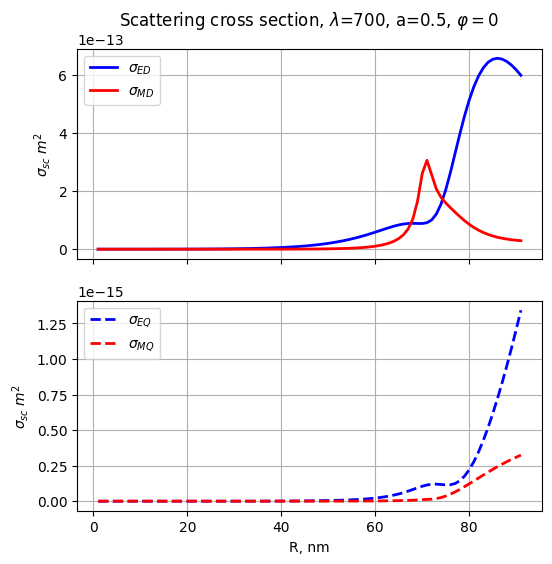

In [9]:
from numpy import pi
sigma_sc = np.loadtxt('data-export-25-02-25/sigma_sc_700nm_au_a_05_phase_0.txt', skiprows=8, delimiter=',')

wl = 700

fig, [ax1, ax2] = plt.subplots(2,1, figsize=(6,6), sharex=True)

ax1.plot(sigma_sc[:,0], sigma_sc[:,1], label='$\\sigma_{ED}$', lw=2, c='blue')
ax1.plot(sigma_sc[:,0], sigma_sc[:,2], label='$\\sigma_{MD}$', lw=2, c='red')
ax2.plot(sigma_sc[:,0], sigma_sc[:,3], label='$\\sigma_{EQ}$', lw=2, c='blue', ls='--')
ax2.plot(sigma_sc[:,0], sigma_sc[:,4], label='$\\sigma_{MQ}$', lw=2, c='red', ls='--')
ax1.grid()
ax2.grid()
ax2.set_xlabel('R, nm')
ax1.set_ylabel('$\\sigma_{sc}\;m^2$')
ax2.set_ylabel('$\\sigma_{sc}\;m^2$')
ax1.set_title(f'Scattering cross section, $\\lambda$={wl}, a=0.5, $\\varphi=0$')
ax1.legend()
ax2.legend()
plt.savefig(f'scat_sc_{wl}nm.pdf', format="pdf", bbox_inches='tight')
plt.show()